To execute the first snippet of this script a requirement is to have SeuratDisk installed. Anndata2ri have issues and do not transfer everything from scratch.
A conda environment where only Seurat and SeuratDisk are installed from scratch into R are recommended (e.g. `r_seurat`)
https://mojaveazure.github.io/seurat-disk/articles/convert-anndata.html

In [ ]:
# %%R
# library(Seurat)
# library(SeuratDisk)
# eccite <- readRDS('data/eccite_mixscape.rds')
# Convert("data/eccite_mixscape.h5Seurat", dest = "h5ad")
# SaveH5Seurat(eccite, filename = "data/eccite_mixscape.h5Seurat")

In [15]:
import scanpy as sc

In [44]:
ad = sc.read_h5ad('../data/eccite_mixscape.h5ad')

In [54]:
ad

# Fix some columns for basic visualization

ad.obs['replicate'] = ad.obs['replicate'].astype('category').map({0: 'rep1', 1: 'rep2', 2: 'rep3'})
ad.obs['Phase'] = ad.obs['Phase'].astype('category').map({0: 'G1', 1: 'G2M', 2: 'S'})

ad.obs['crispr'] = ad.obs['crispr'].astype('category').map({0: 'NT', 1: 'Perturbed'})

In [46]:
sc.set_figure_params(facecolor='white')

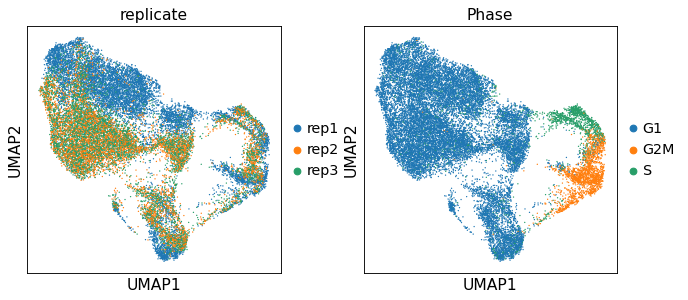

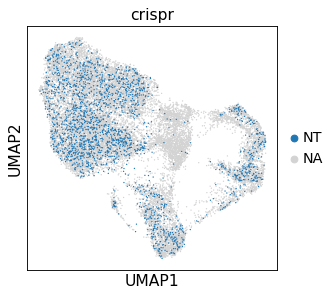

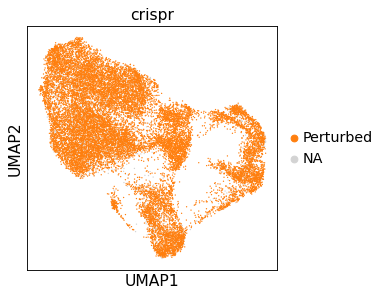

In [61]:
sc.pl.umap(ad, color=['replicate', 'Phase'])
sc.pl.umap(ad, color=['crispr'], groups=['NT'])
sc.pl.umap(ad, color=['crispr'], groups=['Perturbed'])

In [ ]:
# save for later usage

In [64]:
ad.write('../data/eccite_mixscape_clean.h5ad', compression='lzf')